In [4]:
import pandas as pd
import numpy as np
import os
import glob

data_folder = r"C:\Users\qp24297\Desktop\Final_dataset"
target_substance = "fluoroanthene"

all_dfs = []

excel_files = glob.glob(os.path.join(data_folder, "*.xlsx"))

for file in excel_files:
    try:
        xls = pd.ExcelFile(file)
        filename = os.path.basename(file)

        # Extract year from filename
        year = next((int(s) for s in filename.split() if s.isdigit() and 2015 <= int(s) <= 2025), None)

        # Match sheet that contains the year AND the word 'substance' (singular or plural), case-insensitive
        sheet_name = next(
            (s for s in xls.sheet_names if str(year) in s and "substance" in s.lower()),
            None
        )

        if not sheet_name:
            print("Skipped file:", filename, "- Sheet not found for year", year)
            continue

        # Load header and data
        header = pd.read_excel(xls, sheet_name=sheet_name, skiprows=8, nrows=1)
        columns = header.iloc[0].tolist()

        df = pd.read_excel(xls, sheet_name=sheet_name, skiprows=9, header=None)
        df.columns = columns
        df = df.iloc[1:]

        df["year"] = year
        all_dfs.append(df)

        print("Loaded file:", filename, "| Sheet:", sheet_name, "| Records:", len(df))

    except Exception as e:
        print("Error loading file:", filename, "| Error:", str(e))

# Combine all data
if not all_dfs:
    raise ValueError("No files were successfully loaded. Please check folder and file structure.")

df_all = pd.concat(all_dfs, ignore_index=True)
print("\nTotal combined records from all years:", len(df_all))

Loaded file: 2016 Pollution Inventory dataset - version 2.xlsx | Sheet: 2016 substances | Records: 31739
Loaded file: 2017 Pollution Inventory Dataset.xlsx | Sheet: 2017 Substances | Records: 31969
Loaded file: 2018 Pollution Inventory.xlsx | Sheet: 2018 Substance | Records: 1048563
Loaded file: 2019 Pollution Inventory Dataset v2.xlsx | Sheet: 2019 Substances | Records: 32874
Loaded file: 2020 Pollution Inventory Dataset v2.xlsx | Sheet: 2020 Substances | Records: 31746
Loaded file: 2021 Pollution Inventory Dataset.xlsx | Sheet: 2021 Substances | Records: 32334
Loaded file: 2022 Pollution Inventory Dataset v2.xlsx | Sheet: 2022 Substances | Records: 31489
Loaded file: 2023 Pollution Inventory Dataset V2.xlsx | Sheet: 2023 Substances | Records: 30110
Error loading file: 2023 Pollution Inventory Dataset V2.xlsx | Error: [Errno 13] Permission denied: 'C:\\Users\\qp24297\\Desktop\\Final_dataset\\~$2016 Pollution Inventory dataset - version 2.xlsx'
Error loading file: 2023 Pollution Invent

In [5]:
import numpy as np

# Step 1: Standardize column names
df_all.columns = df_all.columns.str.strip().str.lower()
df_all["substance name"] = df_all["substance name"].astype(str).str.lower()

# Step 2: Filter for exact match "fluoranthene"
target_df = df_all[df_all["substance name"].str.strip() == "fluoranthene"].copy()

# Step 3: Clean numeric fields
target_df["quantity released (kg)"] = pd.to_numeric(target_df["quantity released (kg)"], errors='coerce')
target_df["reporting threshold (kg)"] = pd.to_numeric(target_df["reporting threshold (kg)"], errors='coerce')

# Step 4: Drop invalid rows
target_df = target_df.dropna(subset=["quantity released (kg)", "reporting threshold (kg)", "site address", "year"])
qty = target_df["quantity released (kg)"]
threshold = target_df["reporting threshold (kg)"].mean()

In [6]:
top_emitters = (
    target_df.groupby("operator name")["quantity released (kg)"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(20)
)

print("Top 20 Fluoranthene-emitting companies:")
print(top_emitters)


Top 20 Fluoranthene-emitting companies:
                             operator name  quantity released (kg)
0             VIRIDOR WASTE MANAGEMENT LTD               104.07786
1               THAMES WATER UTILITIES LTD                87.44870
2               UNITED UTILITIES WATER PLC                49.55200
3                   SEVERN TRENT WATER LTD                42.06000
4               Esso Petroleum Company Ltd                40.01000
5                            Anglian Water                16.79000
6                   Longs Steel UK Limited                13.75000
7                   NORTHUMBRIAN WATER LTD                13.34000
8                           Southern Water                12.70000
9            Severn Waste Services Limited                 9.79700
10                            Wessex Water                 8.93000
11                   British Steel Limited                 7.37000
12        Viridor Waste Management Limited                 5.62173
13  Sahaviriya Steel I

C:\Users\qp24297\AppData\Local\Temp\ipykernel_41588\3575242277.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_emitters_plot, x="quantity released (kg)", y="operator name", palette="Reds_r")


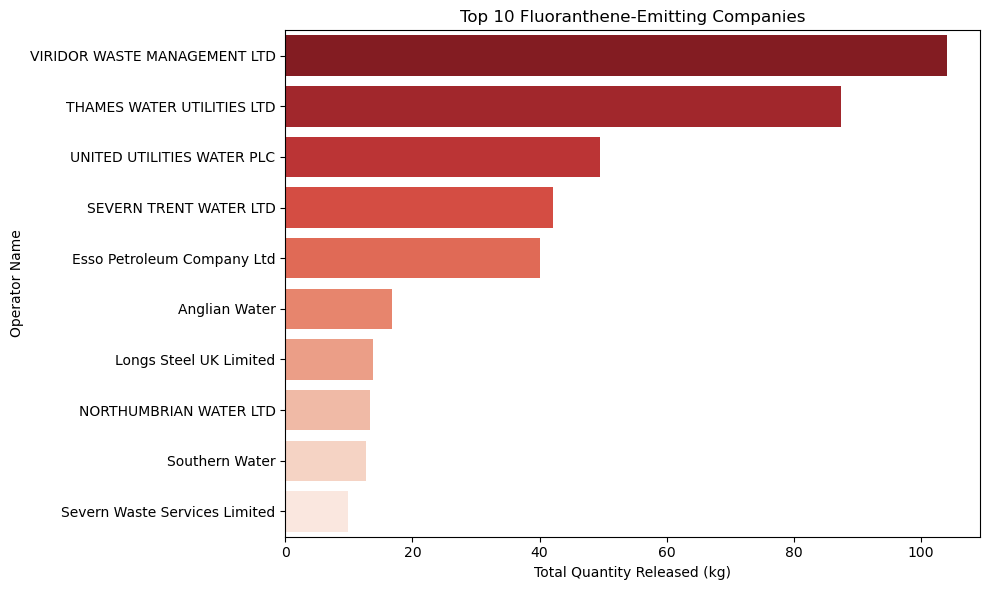

In [7]:
top_emitters_plot = top_emitters.head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=top_emitters_plot, x="quantity released (kg)", y="operator name", palette="Reds_r")
plt.title("Top 10 Fluoranthene-Emitting Companies")
plt.xlabel("Total Quantity Released (kg)")
plt.ylabel("Operator Name")
plt.tight_layout()
plt.show()


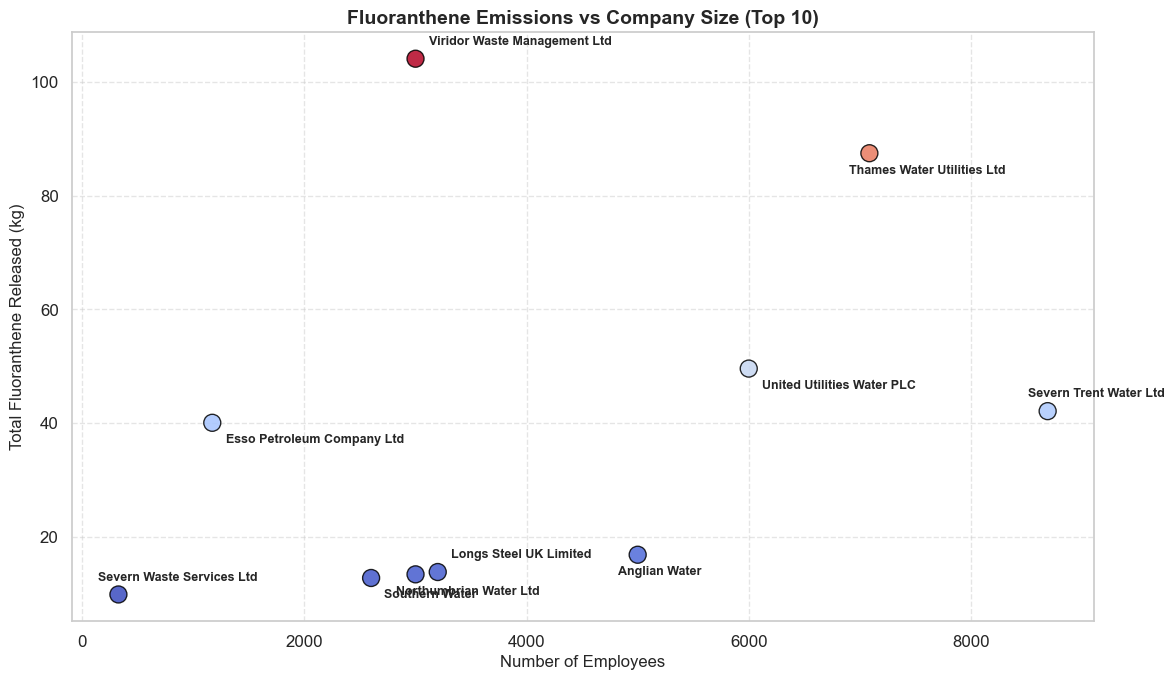

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 公司数据
company_data = {
    "Company": [
        "Viridor Waste Management Ltd",
        "Thames Water Utilities Ltd",
        "United Utilities Water PLC",
        "Severn Trent Water Ltd",
        "Esso Petroleum Company Ltd",
        "Anglian Water",
        "Longs Steel UK Limited",
        "Northumbrian Water Ltd",
        "Southern Water",
        "Severn Waste Services Ltd"
    ],
    "Quantity Released (kg)": [
        104.08, 87.45, 49.55, 42.06, 40.01, 16.79, 13.75, 13.34, 12.70, 9.80
    ],
    "Employees": [
        3000, 7086, 6000, 8691, 1170, 5000, 3200, 3000, 2600, 325
    ]
}

df = pd.DataFrame(company_data)

sns.set_theme(style="whitegrid", font_scale=1.1)

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df,
    x="Employees",
    y="Quantity Released (kg)",
    s=150,
    hue="Quantity Released (kg)",
    palette="coolwarm",
    edgecolor="black",
    alpha=0.85,
    legend=False
)

for i, row in df.iterrows():
    dx = 120 if i % 2 == 0 else -180     
    dy = 2.5 if i % 3 == 0 else -3.5     
    plt.text(
        row["Employees"] + dx,
        row["Quantity Released (kg)"] + dy,
        row["Company"],
        fontsize=9,
        weight="bold"
    )


plt.title("Fluoranthene Emissions vs Company Size (Top 10)", fontsize=14, weight='bold')
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Total Fluoranthene Released (kg)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
